# QuakeFlow demo

In [1]:
import os
root_path = "./"
def run(root_path, script):
    cmd = f"cd {root_path} && python {script}"
    print(cmd)
    os.system(cmd)

### Set configuration parameters

**Edit the [config.json](./QuakeFlow/slurm/config.json) file to add parameters of studying region**

**Edit the [set_config.py](./QuakeFlow/slurm/set_config.py) file to select the studying region**

You can search for earthquake information here: [USGS](https://earthquake.usgs.gov/earthquakes/map/?extent=10.66061,-133.33008&extent=58.53959,-56.68945&range=month&magnitude=all&settings=true)

You can search for seismic network information here: [IRIS](http://ds.iris.edu/gmap/#network=*&starttime=2023-10-01&planet=earth)

In [2]:
run(root_path, "set_config.py")

cd ./ && python set_config.py
{
    "num_nodes": 1,
    "sampling_rate": 100,
    "degree2km": 111.19492474777779,
    "channel": "BH*,HH*,EH*,HN*",
    "level": "response",
    "gamma": {
        "zmin_km": 0,
        "zmax_km": 60
    },
    "cctorch": {
        "sampling_rate": 100,
        "time_before": 0.25,
        "time_after": 1.0,
        "components": "ENZ123",
        "component_mapping": {
            "3": 0,
            "2": 1,
            "1": 2,
            "E": 0,
            "N": 1,
            "Z": 2
        }
    },
    "starttime": "2013-01-01T00:00:00",
    "endtime": "2013-12-31T23:59:59",
    "longitude0": -122.17,
    "latitude0": 36.69,
    "maxradius_degree": 0.5,
    "minlatitude": 36.19,
    "maxlatitude": 37.19,
    "minlongitude": -122.67,
    "maxlongitude": -121.67,
    "network": "NC,BK",
    "provider": [
        "NCEDC",
        "IRIS"
    ]
}


### Download stations and events

**Edit the [download_station.py](./QuakeFlow/slurm/download_station.py) file to select the studying region**

**Edit the [download_catalog.py](./QuakeFlow/slurm/download_catalog.py) file to select the studying region**

In [ ]:
run(root_path, "download_station.py")

In [ ]:
#run(root_path, "download_station.py")

run(root_path, "download_catalog.py")

### Download continuous waveform data

**Edit the [download_waveform_v2.py](./QuakeFlow/slurm/download_waveform_v2.py) file to select the studying region**

In [ ]:
run(root_path, "download_waveform_v2.py")

### Run Phase Picking: PhaseNet

**Edit the [run_phasenet.py](./QuakeFlow/slurm/run_phasenet.py) file to select the studying region**

In [4]:
run(root_path, "run_phasenet.py")

cd ./QuakeFlow/slurm/ && python run_phasenet.py


2023-11-06 02:11:53.321536: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-11-06 02:11:53.352701: E tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:9342] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2023-11-06 02:11:53.352742: E tensorflow/compiler/xla/stream_executor/cuda/cuda_fft.cc:609] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2023-11-06 02:11:53.352783: E tensorflow/compiler/xla/stream_executor/cuda/cuda_blas.cc:1518] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2023-11-06 02:11:53.359490: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-11-06 02:11:53.359743: I tensorflow/core/platform/cpu_feature_guard.cc:182] This Tens

Done with 1941 P-picks and 1827 S-picks


### Run Phase Association: GaMMA

**Edit the [run_gamma.py](./QuakeFlow/slurm/run_gamma.py) file to select the studying region**

In [ ]:
run(root_path, "run_gamma.py")

### Visualization

In [3]:
import pandas as pd
import json
import matplotlib.pyplot as plt
import numpy as np
import obspy

**Read Catalog**

In [4]:
folder = 'MontereyBay'

with open(f"{root_path}/local/{folder}/config.json") as f:
    config = json.load(f)
plot_standard_catalog = True

gamma_events = pd.read_csv(f"{root_path}/local/{folder}/gamma/gamma_events.csv", parse_dates=["time"])
gamma_events.sort_values("gamma_score", ascending=False, inplace=True)
gamma_picks = pd.read_csv(f"{root_path}/local/{folder}/gamma/gamma_picks.csv", parse_dates=["phase_time"])
gamma_picks["phase_time"] = gamma_picks["phase_time"].dt.tz_localize("UTC")
stations = pd.read_csv(f"{root_path}/local/{folder}/obspy/stations.csv")
stations["location"] = stations["location"].fillna("")
if plot_standard_catalog:
    standard_catalog = pd.read_csv(f"{root_path}/local/{folder}/obspy/catalog.csv", parse_dates=["time"])

In [5]:
 standard_catalog

,event_id,time,magnitude,latitude,longitude,depth_km,x_km,y_km,z_km
0,nc72133791,2013-12-31 21:29:49.680000+00:00,2.19,37.33717,-122.42783,9.291,-22.849,71.853,9.291
1,nc72133711,2013-12-31 19:04:03.410000+00:00,1.21,37.32567,-122.11083,-0.336,5.244,70.547,-0.336
2,nc72133606,2013-12-31 15:37:04.280000+00:00,1.40,37.33567,-122.42167,9.122,-22.303,71.685,9.122
3,nc72133506,2013-12-31 11:42:19.420000+00:00,1.82,37.33217,-122.42850,9.830,-22.910,71.298,9.830
4,nc72133456,2013-12-31 09:19:04.860000+00:00,0.95,37.00467,-121.46050,7.758,63.150,35.155,7.758
...,...,...,...,...,...,...,...,...,...
2268,8985233,2013-01-26 18:39:24.290000+00:00,2.60,37.17300,-122.36000,10.600,-16.874,53.619,10.600
2269,8977569,2013-01-19 02:38:20.900000+00:00,2.90,36.65400,-121.27900,7.300,79.667,-3.625,7.300
2270,8972555,2013-01-14 07:22:18+00:00,2.60,37.38300,-121.72900,9.200,39.058,76.999,9.200
2271,8967782,2013-01-09 18:13:09.530000+00:00,2.20,37.55900,-122.43100,11.000,-23.062,96.475,11.000


In [6]:
MOBB_event_idx = np.unique(gamma_picks[(gamma_picks.event_index != -1) & (gamma_picks.station_id == 'BK.MOBB.00.BH')].event_index)

In [7]:
def convert_float_to_str(value):
    str_value = str(value)
    return str_value.replace('.','')

stations['location'] = stations['location'].apply(convert_float_to_str)

In [8]:
with pd.option_context('display.max_rows', None,
                       'display.max_columns', None,
                       'display.precision', 3,
                       ):

    display(gamma_events[0:100])

,time,x(km),y(km),z(km),magnitude,sigma_time,sigma_amp,cov_time_amp,event_index,gamma_score,longitude,latitude,depth_km
4224,2013-12-10 21:16:53.365,19.715,106.325,3.318,2.896,1.163,0.264,-0.242,3184,66.000,-121.947,37.648,3.318
4018,2013-12-02 10:09:51.666,55.470,17.468,0.000,2.111,0.602,0.334,0.024,4087,40.000,-121.548,36.846,0.000
3248,2013-10-22 21:48:50.721,90.165,-25.959,0.000,2.467,0.862,0.444,0.589,2479,39.069,-121.164,36.452,0.000
3977,2013-11-28 05:05:31.204,52.764,19.714,7.549,1.344,0.648,0.381,0.023,1681,39.000,-121.578,36.866,7.549
1191,2013-05-06 11:20:59.546,60.620,27.094,0.000,2.106,0.577,0.315,0.012,332,39.000,-121.490,36.932,0.000
4016,2013-12-02 09:34:23.804,60.017,26.501,10.155,2.328,0.485,0.315,0.018,1119,38.000,-121.496,36.927,10.155
3471,2013-10-29 11:42:41.553,37.796,82.301,0.000,2.223,0.421,0.344,0.022,952,37.992,-121.743,37.431,0.000
2970,2013-10-05 10:55:50.209,71.956,3.222,21.000,2.227,0.566,0.343,-0.030,1436,37.974,-121.365,36.716,21.000
2243,2013-08-09 10:37:24.725,60.491,9.184,11.355,2.467,0.591,0.409,0.044,4317,37.000,-121.492,36.771,11.355
2500,2013-08-29 01:23:44.340,29.971,46.320,1.627,1.899,0.458,0.468,0.059,3188,37.000,-121.833,37.107,1.627


**Select event and picks for visulization**

In [54]:
event_gamma_id = 10

event = gamma_events.iloc[event_gamma_id]
event_gamma_score = event.gamma_score
picks = gamma_picks[gamma_picks.event_index == event.event_index]
stations["id"] = stations.network + "." + stations.station + "." + stations.location + "." + stations.instrument
stations["dist_km"] = np.sqrt((stations.latitude - event.latitude)**2 + (stations.longitude - event.longitude)**2 * np.cos(event.latitude)**2) * 111.19


**Load waveforms**

In [55]:
begin_time = event.time - pd.Timedelta(seconds=0)
end_time = event.time + pd.Timedelta(seconds=30)
waveforms = obspy.Stream()
try:
    #waveforms += obspy.read(f"{root_path}/local/{folder}/waveforms/{begin_time.year}-{begin_time.dayofyear}/{str(begin_time.hour).zfill(2)}/*.mseed")
    waveforms += obspy.read(f"{root_path}/local/{folder}/waveforms/{begin_time.year}-{begin_time.dayofyear}/*.mseed")
except Exception as e:
    print(e)
if end_time.hour != begin_time.hour:
    try:
        #waveforms += obspy.read(f"{root_path}/local/{folder}/waveforms/{end_time.year}-{end_time.dayofyear}/{str(end_time.hour).zfill(2)}/*.mseed")
        waveforms += obspy.read(f"{root_path}/local/{folder}/waveforms/{end_time.year}-{end_time.dayofyear}/*.mseed")
    except Exception as e:
        print(e)
stream = waveforms.copy()
stream.trim(obspy.UTCDateTime(begin_time), obspy.UTCDateTime(end_time), pad=True, fill_value=0);

In [56]:
stream.detrend()
stream.taper(0.05)
#stream.filter('highpass',freq=1)
stream.filter('bandpass',freqmin=3,freqmax=20)

/work/das01/BR/yuancong_gou/EQNet/phasenet/lib/python3.11/site-packages/obspy/signal/filter.py:62: UserWarning: Selected high corner frequency (20) of bandpass is at or above Nyquist (10.0). Applying a high-pass instead.
  warnings.warn(msg)


140 Trace(s) in Stream:

BK.MOBB.00.BHE | 2013-07-29T20:24:25.650000Z - 2013-07-29T20:24:55.650000Z | 20.0 Hz, 601 samples
...
(138 other traces)
...
NC.JUM..HNZ | 2013-07-29T20:24:25.650000Z - 2013-07-29T20:24:55.650000Z | 100.0 Hz, 3001 samples

[Use "print(Stream.__str__(extended=True))" to print all Traces]

**Plotting picks**

<Figure size 640x480 with 0 Axes>

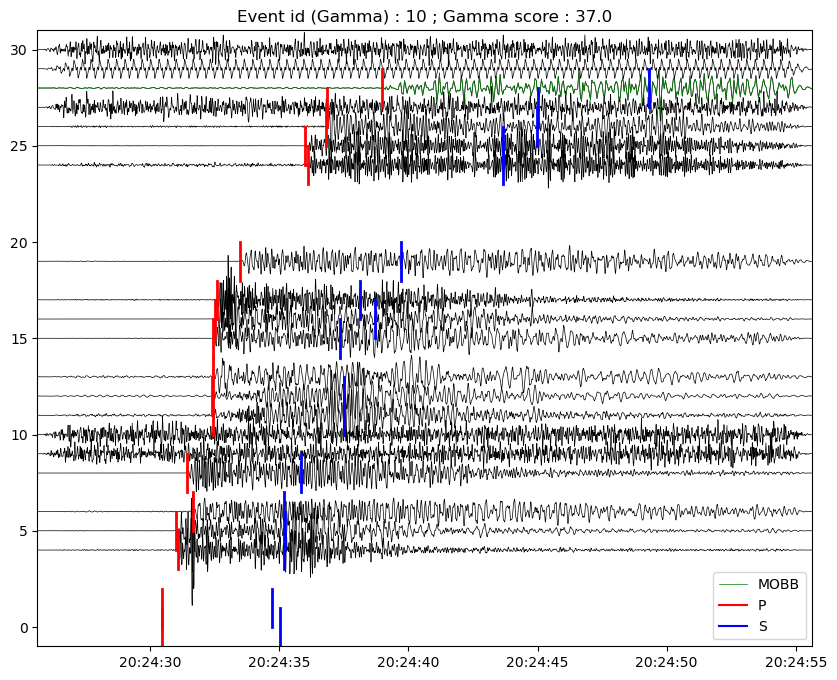

<Figure size 640x480 with 0 Axes>

In [57]:
component = "Z"
stations = stations[stations["component"] == component]
stations.sort_values("dist_km", inplace=True)
stations.reset_index(inplace=True, drop=True)
normalize = lambda x: (x-np.mean(x))/(np.std(x) + np.finfo(float).eps)/4
fig, ax = plt.subplots(figsize=(10, 8))

for i, station in stations.iterrows():
    dist_km = station.dist_km
    #print(station.id)
    tr = stream.select(id=station.id+component)
    if len(tr) == 1:
        tr = tr[0]
        #ax.plot(tr.times("matplotlib") , normalize(tr.data) + dist_km, "k", linewidth=0.5)
        ax.plot(tr.times("matplotlib") , normalize(tr.data) + i, "k", linewidth=0.5)
        if station.station == 'MOBB':
            ax.plot(tr.times("matplotlib") , normalize(tr.data) + i, "green", linewidth=0.5,label = 'MOBB')
        

color = {"P": "r", "S": "b"}
for _, pick in picks.iterrows():
    try:
        y = stations[stations.id == pick.station_id].index.values[0]
    except:
        continue
    ax.plot([pick.phase_time, pick.phase_time], [y-1, y+1], color[pick.phase_type], linewidth=2)
ax.plot([], [], "r", label="P")
ax.plot([], [], "b", label="S")
ax.legend(loc="lower right")
ax.xaxis_date()
ax.set_xlim(begin_time, end_time)
ax.set_ylim(-1, len(stations))

plt.title('Event id (Gamma) : ' + str(event_gamma_id) + ' ; Gamma score : '+str(event_gamma_score))
plt.figure(facecolor='w') 


**Plotting catalog**

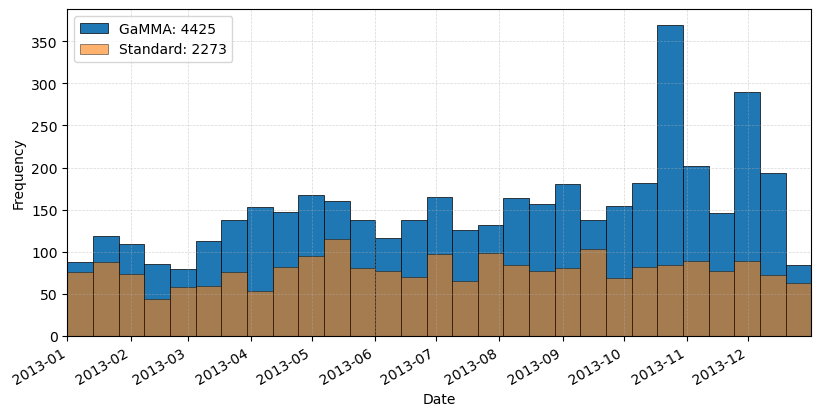

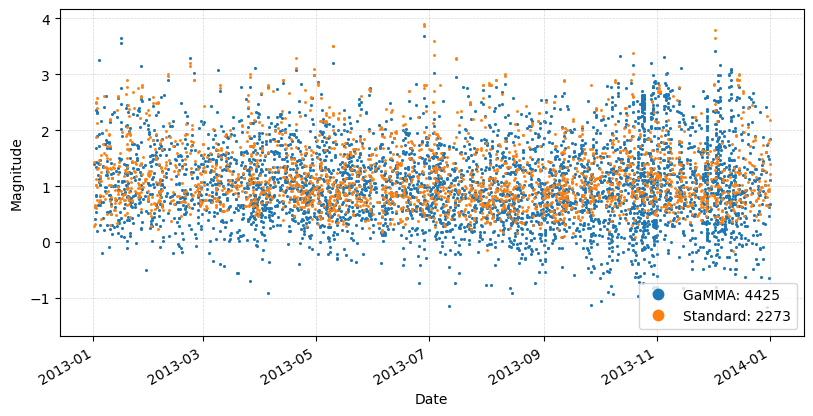

In [14]:
gamma_label = "GaMMA"
standard_label = "Standard"

bins = pd.date_range(start=config["starttime"], end=config["endtime"], periods=30)
plt.figure(figsize=plt.rcParams["figure.figsize"] * np.array([1.5, 1.0]))
plt.hist(
    gamma_events["time"],
    bins=bins,
    edgecolor="k",
    alpha=1.0,
    linewidth=0.5,
    label=f"{gamma_label}: {len(gamma_events['time'])}",
)
if plot_standard_catalog:
    plt.hist(
        standard_catalog["time"],
        bins=bins,
        edgecolor="k",
        alpha=0.6,
        linewidth=0.5,
        label=f"{standard_label}: {len(standard_catalog['time'])}",
    )
plt.ylabel("Frequency")
plt.xlabel("Date")
plt.gca().autoscale(enable=True, axis="x", tight=True)
# plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%m-%d:%H'))
plt.gcf().autofmt_xdate()
plt.legend()
plt.grid(linestyle="--", linewidth=0.5, alpha=0.5)
plt.show()

gamma_markersize = min(5, 1e5 / len(gamma_events))
standard_markersize = min(5, 1e4 / len(standard_catalog))
plt.figure(figsize=plt.rcParams["figure.figsize"] * np.array([1.5, 1.0]))

plt.scatter(
    gamma_events["time"], gamma_events["magnitude"], s=gamma_markersize, alpha=1.0, linewidth=0, rasterized=True
)
if plot_standard_catalog:
    plt.scatter(
        standard_catalog["time"],
        standard_catalog["magnitude"],
        s=standard_markersize,
        alpha=1.0,
        linewidth=0,
        rasterized=True,
    )

plt.ylabel("Magnitude")
plt.xlabel("Date")
plt.gcf().autofmt_xdate()

plt.gca().set_prop_cycle(None)
xlim = plt.xlim()
ylim = plt.ylim()
plt.plot(xlim[0] - 10, ylim[0] - 10, ".", markersize=15, alpha=1.0, label=f"{gamma_label}: {len(gamma_events)}")
plt.plot(xlim[0] - 10, ylim[0] - 10, ".", markersize=15, alpha=1.0, label=f"{standard_label}: {len(standard_catalog)}")
plt.legend(loc="lower right")
plt.xlim(xlim)
plt.ylim(ylim)
plt.grid(linestyle="--", linewidth=0.5, alpha=0.5)
plt.show()

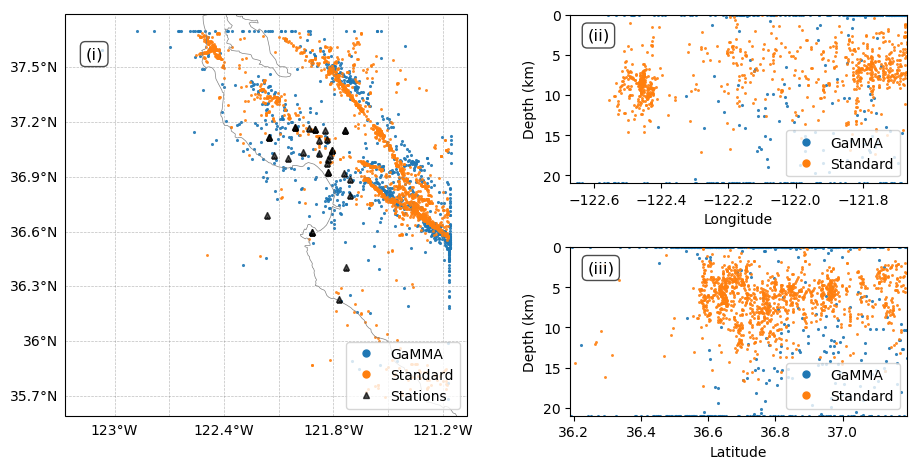

In [31]:
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import cartopy.io.img_tiles as cimgt

#gamma_events_map_view = gamma_events[gamma_events["gamma_score"] > 10]
#gamma_events_map_view = gamma_events[gamma_events["gamma_score"] > 0]
gamma_events_map_view = gamma_events[(gamma_events["gamma_score"] > 0) & (gamma_events["event_index"].isin(MOBB_event_idx))]

plot_standard_catalog = True

fig = plt.figure(figsize=plt.rcParams["figure.figsize"] * np.array([1.5, 1]))
box = dict(boxstyle="round", facecolor="white", alpha=0.7)
text_loc = [0.05, 0.92]

gamma_markersize = min(5, 1e5 / len(gamma_events_map_view["latitude"]))
standard_markersize = min(5, 1e4 / len(standard_catalog["latitude"]))
alpha = 0.9
grd = fig.add_gridspec(ncols=2, nrows=2, width_ratios=[1.5, 1], height_ratios=[1, 1])
ax1 = fig.add_subplot(grd[:, 0], projection=ccrs.PlateCarree())
ax1.set_extent(
    [config["minlongitude"]-0.6, config["maxlongitude"]+0.6, config["minlatitude"]-0.6, config["maxlatitude"]+0.6],
    crs=ccrs.PlateCarree(),
)


ax1.coastlines(resolution="10m", color="gray", linewidth=0.5)
gl = ax1.gridlines(crs=ccrs.PlateCarree(), draw_labels=True, linewidth=0.5, color="gray", alpha=0.5, linestyle="--")
gl.top_labels = False
gl.right_labels = False
ax1.scatter(gamma_events_map_view["longitude"], gamma_events_map_view["latitude"], s=gamma_markersize, linewidth=0, alpha=alpha)
if plot_standard_catalog:
    ax1.scatter(
        standard_catalog["longitude"], standard_catalog["latitude"], s=standard_markersize, linewidth=0, alpha=alpha
    )
# ax1.axis("scaled")
# ax1.set_xlim([config["minlongitude"], config["maxlongitude"]])
# ax1.set_ylim([config["minlatitude"], config["maxlatitude"]])
# ax1.set_xlabel("Latitude")
# ax1.set_ylabel("Longitude")
ax1.set_prop_cycle(None)
ax1.plot(
    config["minlongitude"] - 10, config["minlatitude"] - 10, ".", markersize=10, label=f"{gamma_label}", rasterized=True
)
ax1.plot(
    config["minlongitude"] - 10,
    config["minlatitude"] - 10,
    ".",
    markersize=10,
    label=f"{standard_label}",
    rasterized=True,
)
ax1.plot(stations["longitude"], stations["latitude"], "k^", markersize=5, alpha=0.7, label="Stations")
ax1.text(
    text_loc[0],
    text_loc[1],
    "(i)",
    horizontalalignment="left",
    verticalalignment="top",
    transform=plt.gca().transAxes,
    fontsize="large",
    fontweight="normal",
    bbox=box,
)
plt.legend(loc="lower right")

ax2 = fig.add_subplot(grd[0, 1])
ax2.scatter(
    gamma_events_map_view["longitude"],
    gamma_events_map_view["depth_km"],
    s=gamma_markersize,
    linewidth=0,
    alpha=alpha,
    rasterized=True,
)
if plot_standard_catalog:
    ax2.scatter(
        standard_catalog["longitude"],
        standard_catalog["depth_km"],
        s=standard_markersize,
        linewidth=0,
        alpha=alpha,
        rasterized=True,
    )
ax2.set_xlim([config["minlongitude"], config["maxlongitude"]])
ax2.set_ylim([0, 21])
ax2.invert_yaxis()
ax2.set_xlabel("Longitude")
ax2.set_ylabel("Depth (km)")
ax2.set_prop_cycle(None)
ax2.plot(config["minlongitude"] - 10, 31, ".", markersize=10, label=f"{gamma_label}")
ax2.plot(31, 31, ".", markersize=10, label=f"{standard_label}")
ax2.text(
    text_loc[0],
    text_loc[1],
    "(ii)",
    horizontalalignment="left",
    verticalalignment="top",
    transform=plt.gca().transAxes,
    fontsize="large",
    fontweight="normal",
    bbox=box,
)
plt.legend(loc="lower right")


fig.add_subplot(grd[1, 1])
plt.scatter(
    gamma_events_map_view["latitude"],
    gamma_events_map_view["depth_km"],
    s=gamma_markersize,
    linewidth=0,
    alpha=alpha,
    rasterized=True,
)
if plot_standard_catalog:
    plt.scatter(
        standard_catalog["latitude"],
        standard_catalog["depth_km"],
        s=standard_markersize,
        linewidth=0,
        alpha=alpha,
        rasterized=True,
    )
plt.xlim([config["minlatitude"], config["maxlatitude"]])
plt.ylim([0, 21])
plt.gca().invert_yaxis()
plt.xlabel("Latitude")
plt.ylabel("Depth (km)")
plt.gca().set_prop_cycle(None)
plt.plot(config["minlatitude"] - 10, 31, ".", markersize=10, label=f"{gamma_label}")
plt.plot(31, 31, ".", markersize=10, label=f"{standard_label}")
plt.legend(loc="lower right")
plt.tight_layout()
plt.text(
    text_loc[0],
    text_loc[1],
    "(iii)",
    horizontalalignment="left",
    verticalalignment="top",
    transform=plt.gca().transAxes,
    fontsize="large",
    fontweight="normal",
    bbox=box,
)
plt.show()


In [44]:
gamma_events

,time,x(km),y(km),z(km),magnitude,sigma_time,sigma_amp,cov_time_amp,event_index,gamma_score,longitude,latitude,depth_km
4160,2013-12-10 21:16:53.554,-29.723,56.597,1.006,2.888,0.824,0.266,-0.316,1870,66.000,-122.505,37.200,1.006
3970,2013-12-02 10:09:52.328,45.582,17.351,13.779,2.044,0.625,0.332,0.097,3336,40.000,-121.659,36.845,13.779
1182,2013-05-06 11:21:00.940,45.582,25.906,15.744,1.964,0.865,0.302,0.140,3416,39.000,-121.658,36.922,15.744
1086,2013-04-28 21:49:14.744,45.582,-22.628,0.000,1.915,1.388,0.398,-0.066,3091,38.000,-121.661,36.485,0.000
3927,2013-11-28 05:05:31.740,45.582,19.624,12.062,1.269,0.498,0.390,0.043,1343,37.035,-121.659,36.866,12.062
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4046,2013-12-04 18:09:04.570,26.727,46.317,0.000,1.248,0.231,0.344,0.004,3733,3.632,-121.869,37.107,0.000
3571,2013-11-05 00:23:17.873,45.582,11.531,5.981,0.705,0.405,0.492,-0.026,2035,3.592,-121.659,36.793,5.981
4058,2013-12-04 23:05:50.216,7.925,56.597,0.000,1.013,0.331,0.225,0.023,2594,3.568,-122.081,37.200,0.000
3225,2013-10-23 19:22:07.227,-28.970,27.192,16.746,2.261,0.091,0.373,0.004,1818,3.515,-122.495,36.935,16.746


In [100]:
catalog_hypoDD = pd.read_csv(#f"./local/MontereyBay/hypodd_gamma_2/hypodd_ct.reloc", sep="\s+",
                             #f"./local/MontereyBay/hypodd_gamma_3/hypodd_ct.reloc", sep="\s+",
                             #f"./local/MontereyBay/hypoinv_gamma/hypoDD/hypodd_ct.reloc", sep="\s+", 
                             #f"./local/MontereyBay/hypoinv_gamma/hypoDD/hypodd.loc", sep="\s+", 

                             
                             names=["ID", "latitude", "longitude", "depth_km", "X", "Y", "Z", 
                                    "EX", "EY", "EZ", "YR", "MO", "DY", "HR", "MI", "SC", "MAG", "NCCP", "NCCS", "NCTP",
                                    "NCTS", "RCC", "RCT", "CID"])

In [106]:
catalog_hypoDD = pd.read_csv(f"./local/MontereyBay/hypoinv_gamma/hypoOut.arc.csv", sep=",")


In [107]:
#catalog_hypoDD['event_index'] = catalog_hypoDD['ID'] - 1

In [108]:
catalog_hypoDD.loc[0]

YR           2013.0000
MO              1.0000
DY              1.0000
HR              8.0000
MI              0.0000
SC              5.4300
latitude       37.0230
longitude    -121.4548
depth_km        8.6700
mag             0.0000
RMS             0.1300
EH              2.3900
EZ              3.5600
nn              1.0000
Name: 0, dtype: float64

In [109]:
len(catalog_hypoDD)

1219

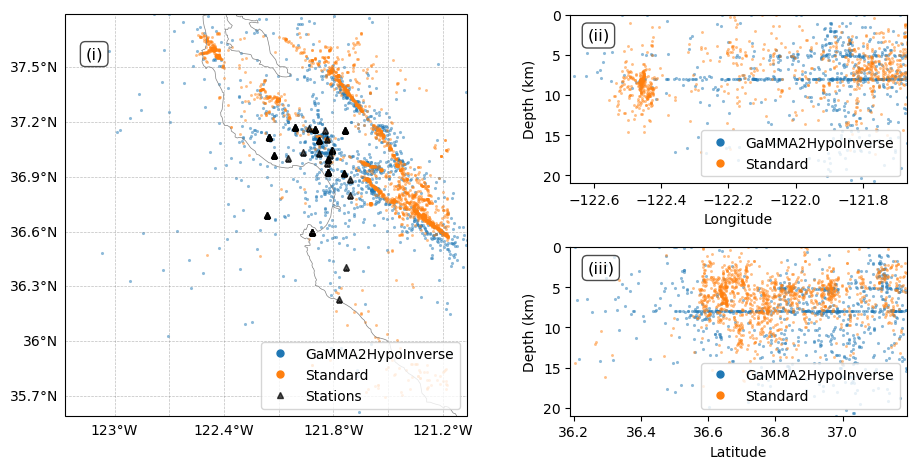

In [110]:
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import cartopy.io.img_tiles as cimgt

#gamma_events_map_view = gamma_events[gamma_events["gamma_score"] > 10]
#gamma_events_map_view = gamma_events[(gamma_events["gamma_score"] > 0) & (gamma_events["event_index"].isin(MOBB_event_idx))]
#gamma_events_map_view = catalog_hypoDD[catalog_hypoDD["event_index"].isin(MOBB_event_idx)]
gamma_events_map_view = catalog_hypoDD

plot_standard_catalog = True

fig = plt.figure(figsize=plt.rcParams["figure.figsize"] * np.array([1.5, 1]))
box = dict(boxstyle="round", facecolor="white", alpha=0.7)
text_loc = [0.05, 0.92]

gamma_markersize = min(5, 1e5 / len(gamma_events_map_view["latitude"]))
standard_markersize = min(5, 1e4 / len(standard_catalog["latitude"]))
alpha = 0.5
grd = fig.add_gridspec(ncols=2, nrows=2, width_ratios=[1.5, 1], height_ratios=[1, 1])
ax1 = fig.add_subplot(grd[:, 0], projection=ccrs.PlateCarree())
ax1.set_extent(
    [config["minlongitude"]-0.6, config["maxlongitude"]+0.6, config["minlatitude"]-0.6, config["maxlatitude"]+0.6],
    crs=ccrs.PlateCarree(),
)


ax1.coastlines(resolution="10m", color="gray", linewidth=0.5)
gl = ax1.gridlines(crs=ccrs.PlateCarree(), draw_labels=True, linewidth=0.5, color="gray", alpha=0.5, linestyle="--")
gl.top_labels = False
gl.right_labels = False
ax1.scatter(gamma_events_map_view["longitude"], gamma_events_map_view["latitude"], s=gamma_markersize, linewidth=0, alpha=alpha)
if plot_standard_catalog:
    ax1.scatter(
        standard_catalog["longitude"], standard_catalog["latitude"], s=standard_markersize, linewidth=0, alpha=alpha
    )
# ax1.axis("scaled")
# ax1.set_xlim([config["minlongitude"], config["maxlongitude"]])
# ax1.set_ylim([config["minlatitude"], config["maxlatitude"]])
# ax1.set_xlabel("Latitude")
# ax1.set_ylabel("Longitude")
ax1.set_prop_cycle(None)
ax1.plot(
    config["minlongitude"] - 10, config["minlatitude"] - 10, ".", markersize=10, label=f"{gamma_label}2HypoInverse", rasterized=True
)
ax1.plot(
    config["minlongitude"] - 10,
    config["minlatitude"] - 10,
    ".",
    markersize=10,
    label=f"{standard_label}",
    rasterized=True,
)
ax1.plot(stations["longitude"], stations["latitude"], "k^", markersize=5, alpha=0.7, label="Stations")
ax1.text(
    text_loc[0],
    text_loc[1],
    "(i)",
    horizontalalignment="left",
    verticalalignment="top",
    transform=plt.gca().transAxes,
    fontsize="large",
    fontweight="normal",
    bbox=box,
)
plt.legend(loc="lower right")

ax2 = fig.add_subplot(grd[0, 1])
ax2.scatter(
    gamma_events_map_view["longitude"],
    gamma_events_map_view["depth_km"],
    s=gamma_markersize,
    linewidth=0,
    alpha=alpha,
    rasterized=True,
)
if plot_standard_catalog:
    ax2.scatter(
        standard_catalog["longitude"],
        standard_catalog["depth_km"],
        s=standard_markersize,
        linewidth=0,
        alpha=alpha,
        rasterized=True,
    )
ax2.set_xlim([config["minlongitude"], config["maxlongitude"]])
ax2.set_ylim([0, 21])
ax2.invert_yaxis()
ax2.set_xlabel("Longitude")
ax2.set_ylabel("Depth (km)")
ax2.set_prop_cycle(None)
ax2.plot(config["minlongitude"] - 10, 31, ".", markersize=10, label=f"{gamma_label}2HypoInverse")
ax2.plot(31, 31, ".", markersize=10, label=f"{standard_label}")
ax2.text(
    text_loc[0],
    text_loc[1],
    "(ii)",
    horizontalalignment="left",
    verticalalignment="top",
    transform=plt.gca().transAxes,
    fontsize="large",
    fontweight="normal",
    bbox=box,
)
plt.legend(loc="lower right")


fig.add_subplot(grd[1, 1])
plt.scatter(
    gamma_events_map_view["latitude"],
    gamma_events_map_view["depth_km"],
    s=gamma_markersize,
    linewidth=0,
    alpha=alpha,
    rasterized=True,
)
if plot_standard_catalog:
    plt.scatter(
        standard_catalog["latitude"],
        standard_catalog["depth_km"],
        s=standard_markersize,
        linewidth=0,
        alpha=alpha,
        rasterized=True,
    )
plt.xlim([config["minlatitude"], config["maxlatitude"]])
plt.ylim([0, 21])
plt.gca().invert_yaxis()
plt.xlabel("Latitude")
plt.ylabel("Depth (km)")
plt.gca().set_prop_cycle(None)
plt.plot(config["minlatitude"] - 10, 31, ".", markersize=10, label=f"{gamma_label}2HypoInverse")
plt.plot(31, 31, ".", markersize=10, label=f"{standard_label}")
plt.legend(loc="lower right")
plt.tight_layout()
plt.text(
    text_loc[0],
    text_loc[1],
    "(iii)",
    horizontalalignment="left",
    verticalalignment="top",
    transform=plt.gca().transAxes,
    fontsize="large",
    fontweight="normal",
    bbox=box,
)
plt.show()


In [44]:
min(max(int((1 - 0.9) / (1 - 0.3) * 4) - 1, 0), 3)

0

In [ ]:
gamma_label = "GaMMA_hypoDD"
standard_label = "Standard"

bins = pd.date_range(start=config["starttime"], end=config["endtime"], periods=30)
plt.figure(figsize=plt.rcParams["figure.figsize"] * np.array([1.5, 1.0]))
plt.hist(
    gamma_events["time"],
    bins=bins,
    edgecolor="k",
    alpha=1.0,
    linewidth=0.5,
    label=f"{gamma_label}: {len(gamma_events['time'])}",
)
if plot_standard_catalog:
    plt.hist(
        standard_catalog["time"],
        bins=bins,
        edgecolor="k",
        alpha=0.6,
        linewidth=0.5,
        label=f"{standard_label}: {len(standard_catalog['time'])}",
    )
plt.ylabel("Frequency")
plt.xlabel("Date")
plt.gca().autoscale(enable=True, axis="x", tight=True)
# plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%m-%d:%H'))
plt.gcf().autofmt_xdate()
plt.legend()
plt.grid(linestyle="--", linewidth=0.5, alpha=0.5)
plt.show()

gamma_markersize = min(5, 1e5 / len(gamma_events))
standard_markersize = min(5, 1e4 / len(standard_catalog))
plt.figure(figsize=plt.rcParams["figure.figsize"] * np.array([1.5, 1.0]))

plt.scatter(
    gamma_events["time"], gamma_events["magnitude"], s=gamma_markersize, alpha=1.0, linewidth=0, rasterized=True
)
if plot_standard_catalog:
    plt.scatter(
        standard_catalog["time"],
        standard_catalog["magnitude"],
        s=standard_markersize,
        alpha=1.0,
        linewidth=0,
        rasterized=True,
    )

plt.ylabel("Magnitude")
plt.xlabel("Date")
plt.gcf().autofmt_xdate()

plt.gca().set_prop_cycle(None)
xlim = plt.xlim()
ylim = plt.ylim()
plt.plot(xlim[0] - 10, ylim[0] - 10, ".", markersize=15, alpha=1.0, label=f"{gamma_label}: {len(gamma_events)}")
plt.plot(xlim[0] - 10, ylim[0] - 10, ".", markersize=15, alpha=1.0, label=f"{standard_label}: {len(standard_catalog)}")
plt.legend(loc="lower right")
plt.xlim(xlim)
plt.ylim(ylim)
plt.grid(linestyle="--", linewidth=0.5, alpha=0.5)
plt.show()

In [111]:
from obspy.geodetics.base import gps2dist_azimuth

In [112]:
gps2dist_azimuth(lat1=36.69,
                 lon1=-122.17,
                 lat2=36.6,
                 lon2=-121.4,
                 a=6378137.0, f=0.0033528106647474805)

(69576.65016625728, 98.0231013672511, 278.48268450288055)

In [113]:
69576.65016625728/1000/111

0.62681666816448

In [119]:
36.69 + 0.5

37.19

In [120]:
-122.17 + 0.5

-121.67